# Algerian forest fire Data Analysis

# 1) Problem statement.
This dataset comprises information regarding forest fier in Algerian forests.
If user can extract some information the cause of temperature in the forest.

# Reading the data

In [ ]:
### 2.1 Import Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [7]:
df.iloc[:127]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


# Remove extra Rows and Add a new column for region

In [8]:
for index in range(df.shape[0]):
    if index < 122:
        df.loc[index,'region'] = 0
    else:
        df.loc[index,'region'] = 1

In [9]:
df.iloc[:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [10]:
df.drop(df.index[122:124], inplace=True)

In [11]:
df.iloc[:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0


In [13]:
df = df.rename(columns = {'Classes  ':'Classes','Rain ':'Rain'})

In [14]:
#Adding a column fire to indicate 0 for no fire and 1 for fire
df['fire'] = pd.factorize(df.Classes)[0]

In [15]:
#Cleaned Data Frame
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,fire
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0,0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0,0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0,0


# Basic Details About Data Set

In [16]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,fire
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0,0


In [17]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,fire
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0,0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0,0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0,0
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0,7


In [18]:
df.shape

(244, 16)

# Summery of the dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    float64
 15  fire         244 non-null    int64  
dtypes: float64(1), int64(1), object(14)
memory usage: 32.4+ KB


Observation: As a lot of relevant columns are in Object type, we need to convert the type to do basic opearation.

Action:Converting desired columns into float

In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region', 'fire'],
      dtype='object')

In [22]:
df = df.astype({'day':'int','month':'int','year':'int','Temperature':'int',' RH':'int',' Ws':'int','Rain':'float','FFMC':'float','DMC':'float','ISI':'float','BUI':'float'})


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4    RH          244 non-null    int32  
 5    Ws          244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    float64
 15  fire         244 non-null    int64  
dtypes: float64(6), int32(6), int64(1), object(3)
memory usage: 26.7+ KB


In [24]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,region,fire
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.500000,0.696721
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.501028,0.883217
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000,-1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,0.500000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000,7.000000


In [25]:
#Dropping Year and Classes are there are no use of these two columns
#Also dropping fire column for now as we will concentrate on the cause of temperatur in the forest
#Dropping Object type columns
df = df.drop(['year','Classes','DC','FWI','region'],axis=1)


In [26]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,fire
0,1,6,29,57,18,0.0,65.7,3.4,1.3,3.4,0
1,2,6,29,61,13,1.3,64.4,4.1,1.0,3.9,0
2,3,6,26,82,22,13.1,47.1,2.5,0.3,2.7,0
3,4,6,25,89,13,2.5,28.6,1.3,0.0,1.7,0
4,5,6,27,77,16,0.0,64.8,3.0,1.2,3.9,0


# Exploring Data

In [27]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'fire']

We have 0 categorical features : []


# Attribute Information

# Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations 2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42 3. RH : Relative Humidity in %: 21 to 90 4. Ws :Wind speed in km/h: 6 to 29 5. Rain: total day in mm: 0 to 16.8 FWI Components 6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 8. Drought Code (DC) index from the FWI system: 7 to 220.4 9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 10. Buildup Index (BUI) index from the FWI system: 1.1 to 68 11. Fire Weather Index (FWI) Index: 0 to 31.1 12. Classes: two classes, namely Fire and not Fire 13. Region: 0 Signifies Bejaia region and 1 signifies Sidi Bel-abbes region 14. Fire: 0 indicstes fire and 1 indicates no fire

# Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

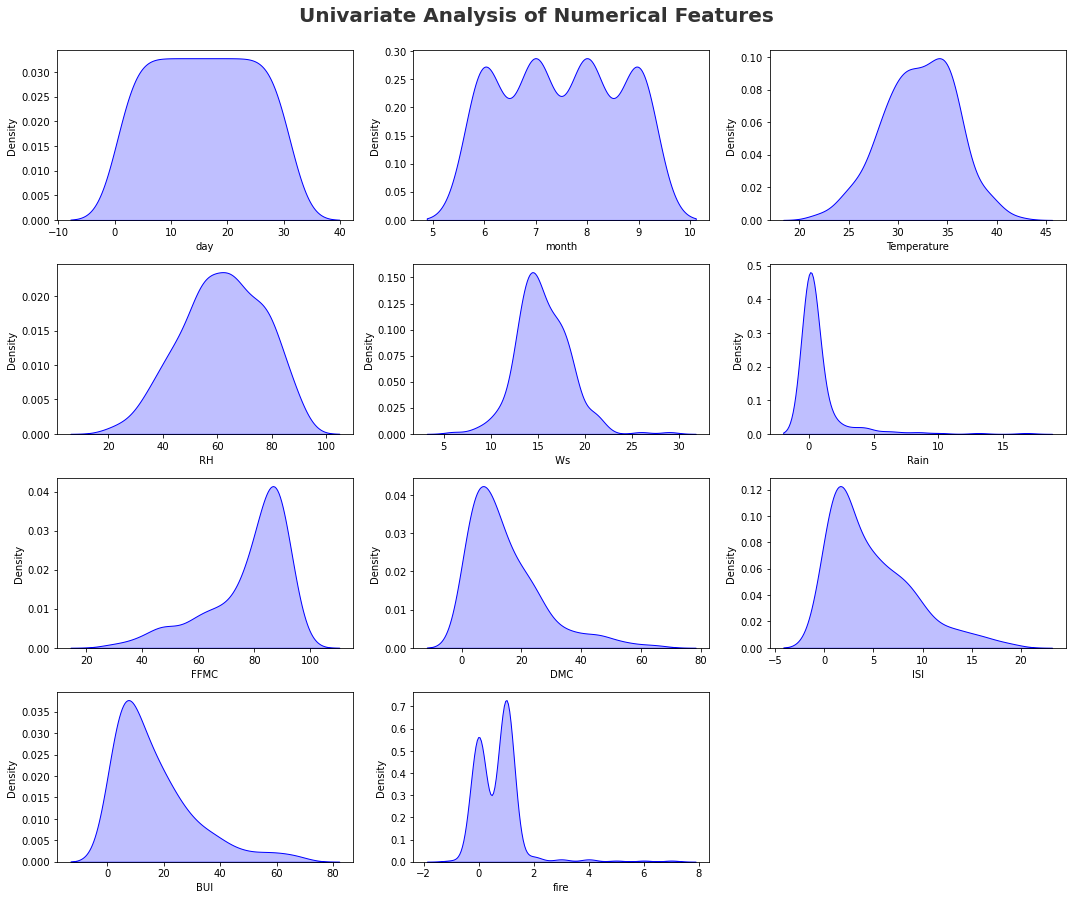

In [28]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# Report

Rain, DMC, BUI, ISI are right skewed and postively skewed.
FFMC is left skewed
Outliers in BUI and DMC power

# Multivariate Analysis

# Check Multicollinearity in Numerical features

In [29]:
df[(list(df.columns)[1:])].corr()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,fire
month,1.000000,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.061680,0.085822,0.108848
Temperature,-0.059017,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,0.106087
RH,-0.037884,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-0.166084
Ws,-0.041447,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,0.012109
Rain,0.035322,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,0.090625
FFMC,0.015577,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,0.283148
DMC,0.068178,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,0.321358
ISI,0.061680,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,0.300620
BUI,0.085822,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,0.332504
fire,0.108848,0.106087,-0.166084,0.012109,0.090625,0.283148,0.321358,0.300620,0.332504,1.000000


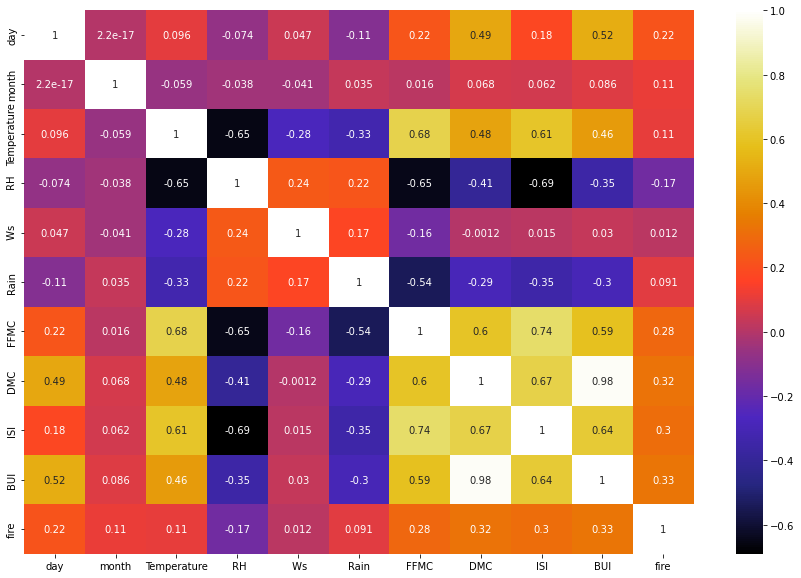

In [30]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

# Report

# Checking Null Values

In [31]:
df.isnull().sum()

day            0
month          0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
ISI            0
BUI            0
fire           0
dtype: int64

In [32]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['day', 'Temperature', ' RH', ' Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI']


array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':' RH'}>,
        <AxesSubplot:title={'center':' Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'BUI'}>,
        <AxesSubplot:title={'center':'fire'}>, <AxesSubplot:>]],
      dtype=object)

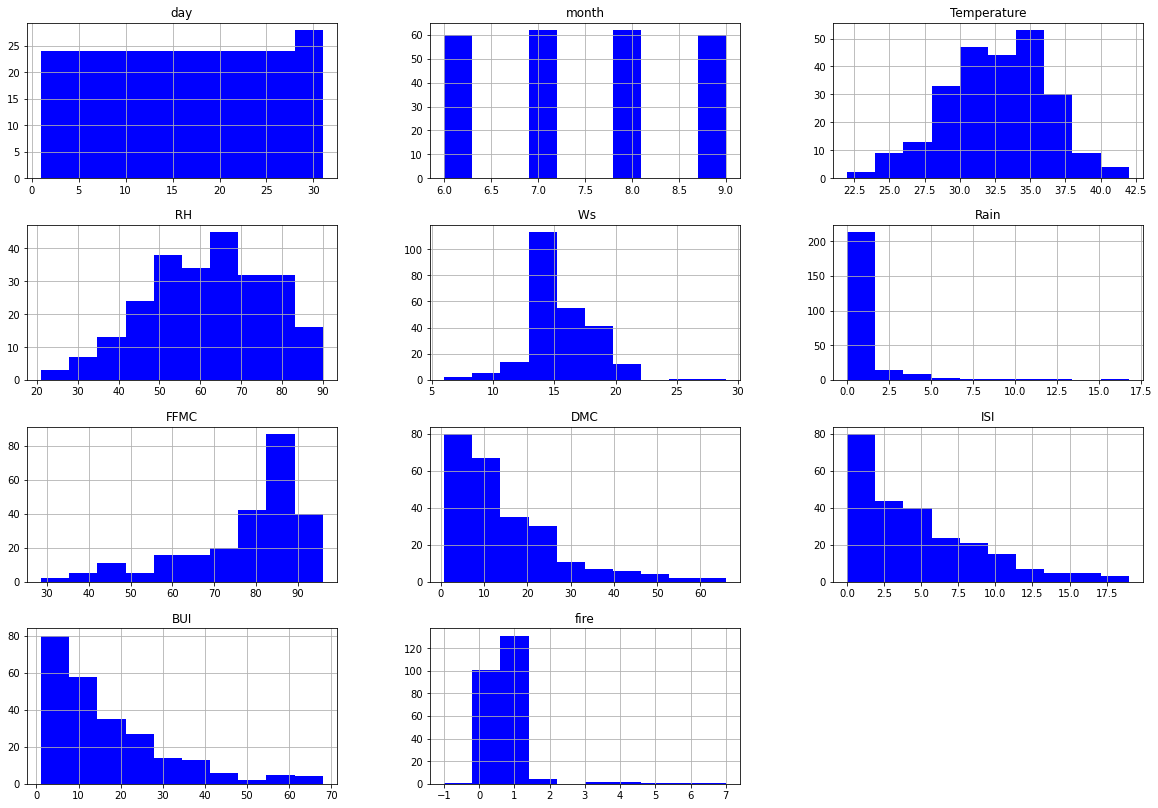

In [33]:
#Histograms
df.hist(figsize=(20,14),color='b')

<AxesSubplot:xlabel='Temperature', ylabel='day'>

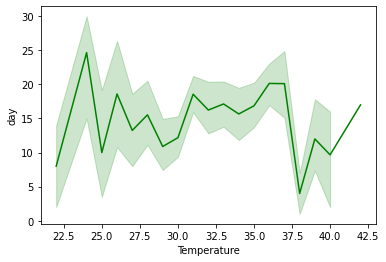

In [34]:
#Line Plot
sns.lineplot(x='Temperature',y='day', data=df,color='g')

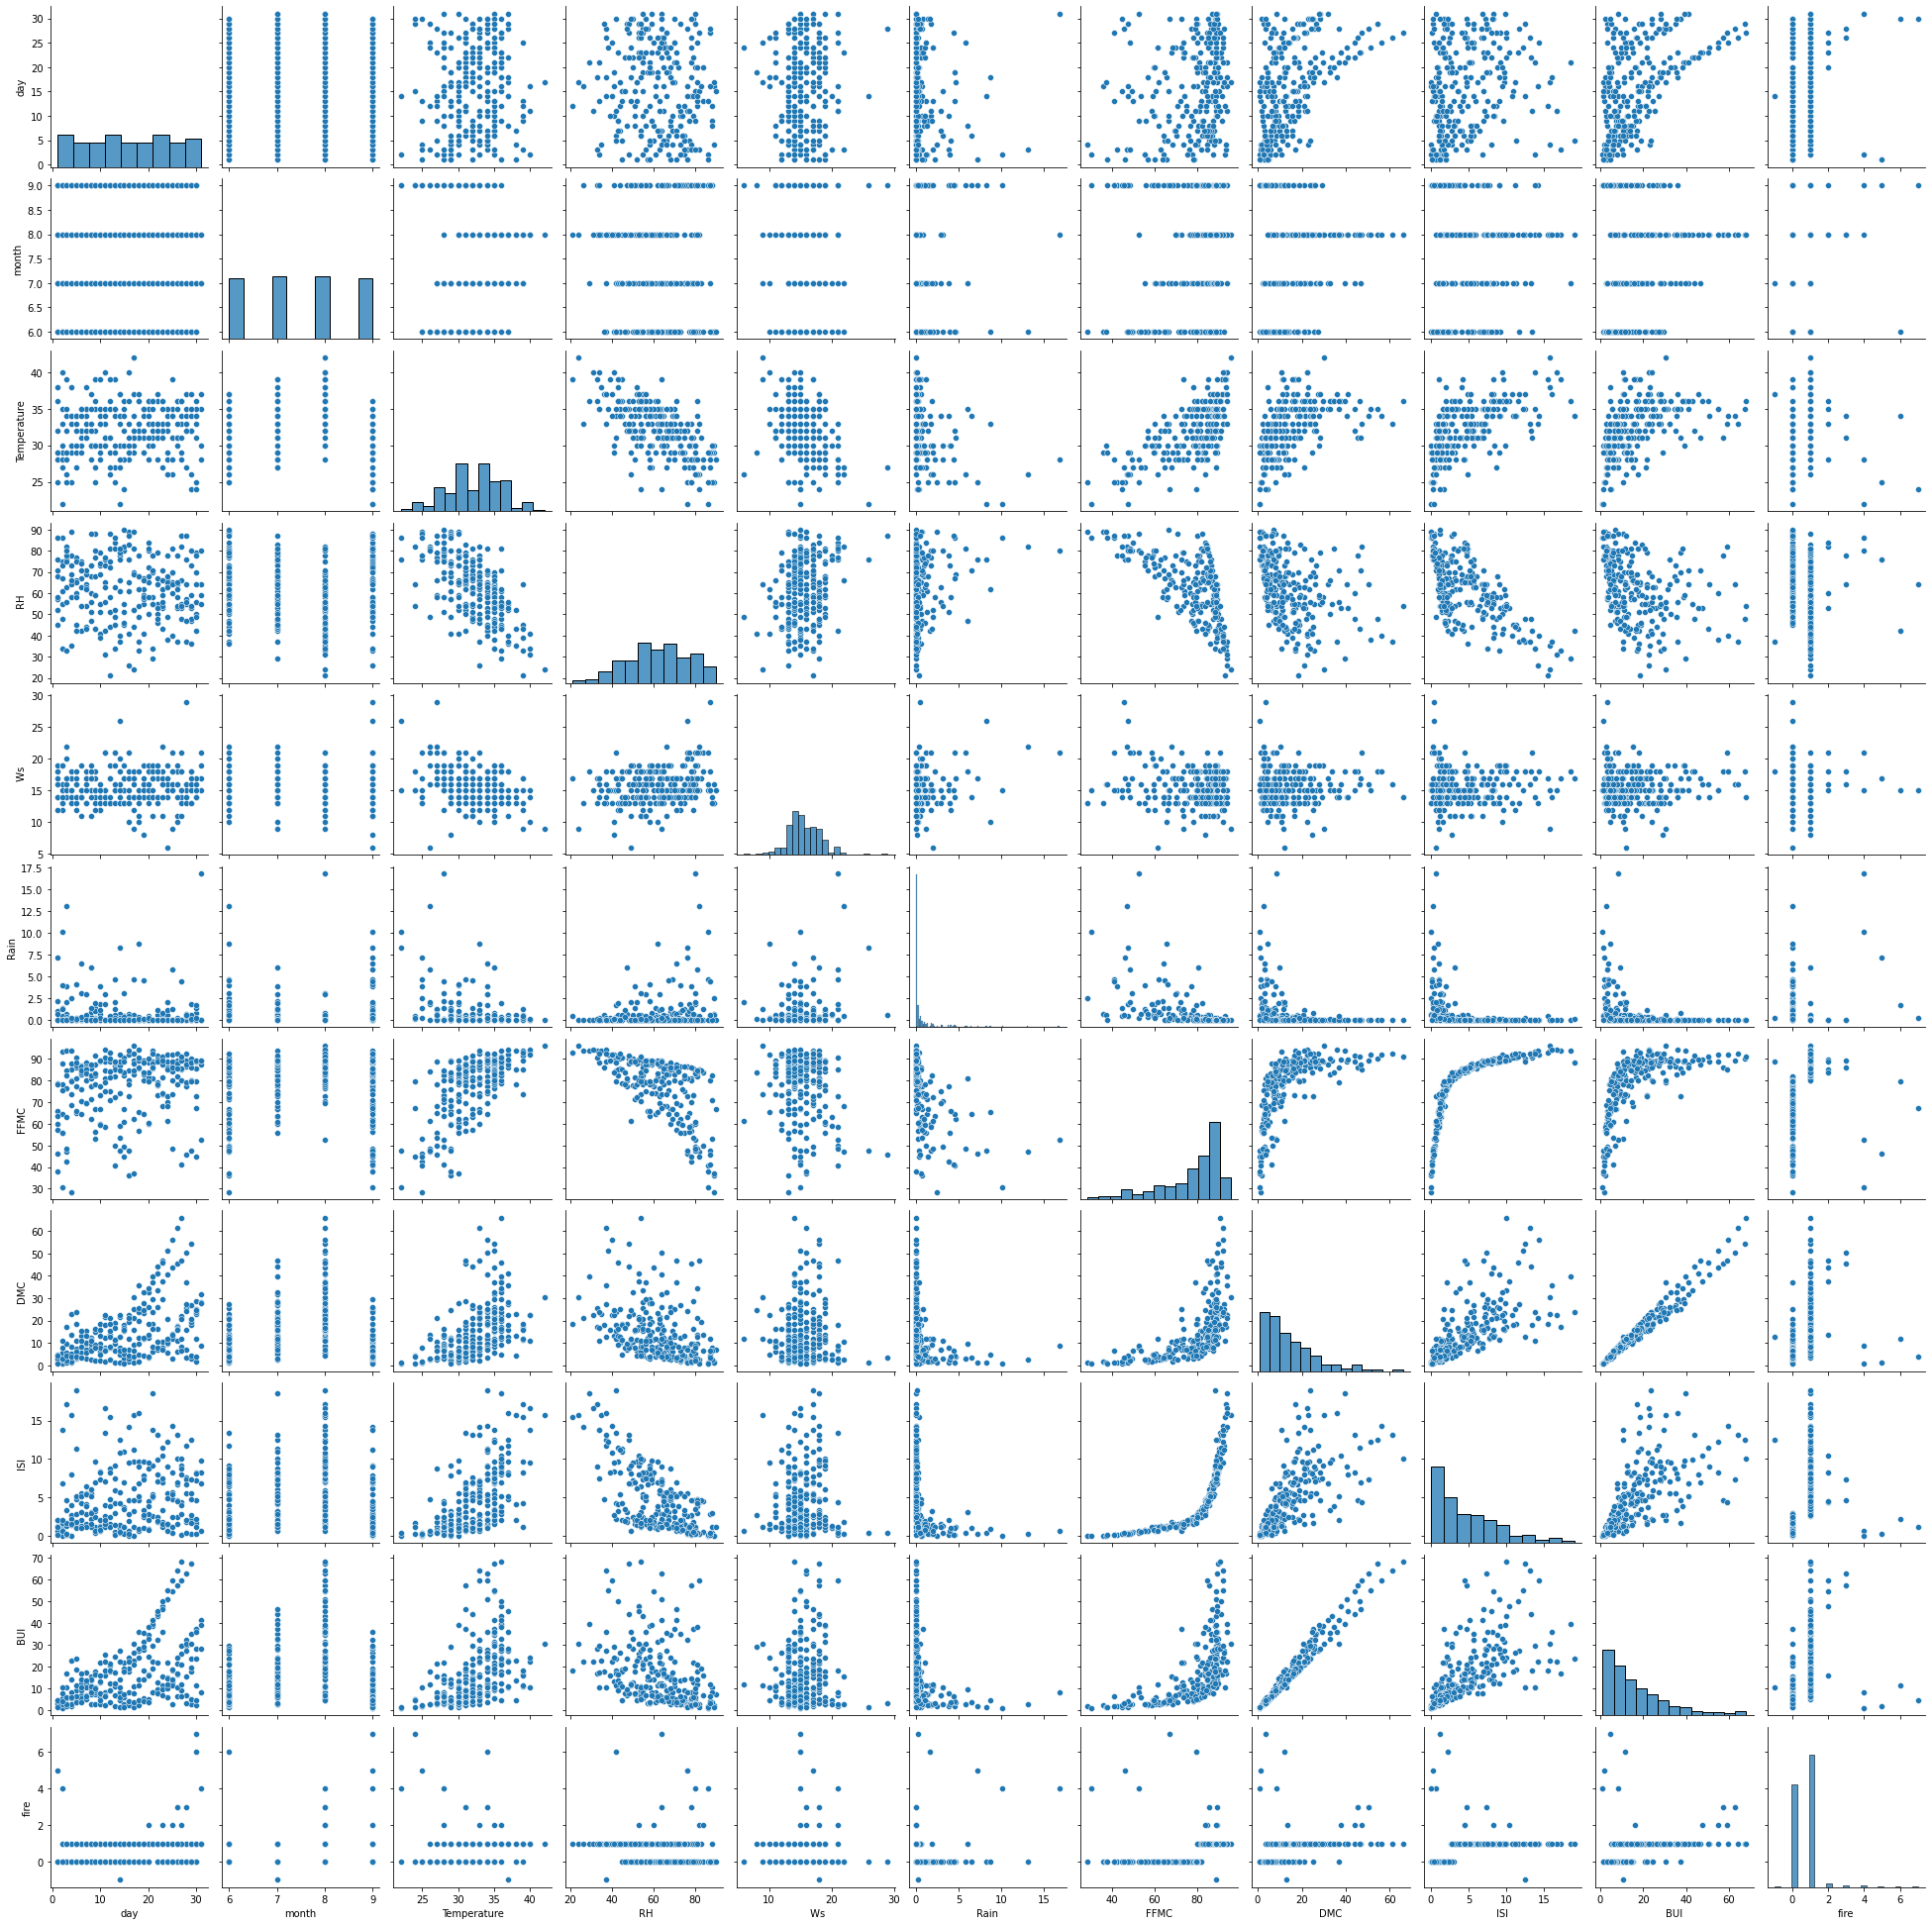

In [35]:
#Pairplot
sns.pairplot(df)

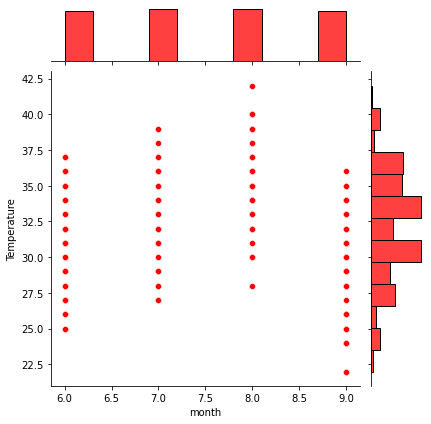

In [39]:
#Jointplot
sns.jointplot(x='month',y='Temperature',data=df,color='r')

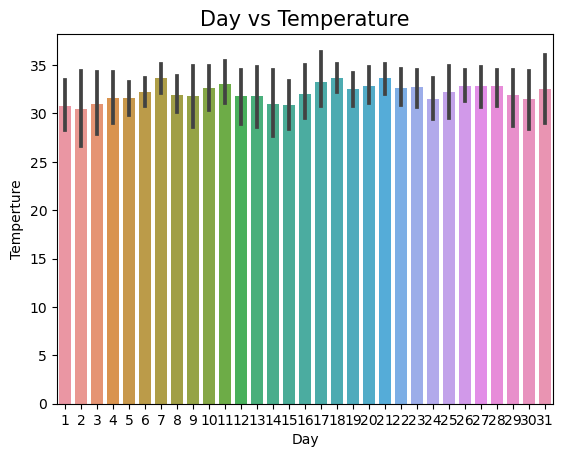

In [40]:
#Barplot
plt.style.use('default')
sns.barplot(x='day',y='Temperature',data=df)
plt.title('Day vs Temperature',fontsize=15)
plt.xlabel('Day')
plt.ylabel('Temperture')
plt.show()

# Basic analysis of data

In [42]:
#The highest temperature in the dataset
df.Temperature.max()

42

In [43]:
#The lowest temperature in the dataset
df.Temperature.min()

22

In [44]:
#When did it rain the most
highest_rain = df.sort_values(by='Rain',ascending=False)[['Rain','day','month']].head(1)
highest_rain


,Rain,day,month
91,16.8,31,8


In [45]:
#When did it rain the least
lowest_rain = df.sort_values(by='Rain',ascending=True)[['Rain','day','month']].head(1)
lowest_rain

,Rain,day,month
0,0.0,1,6


In [46]:
#hotest month
hotest_month = df.sort_values(by='Temperature',ascending=False)[['month']].head(1)
hotest_month 

,month
201,8


In [47]:
#collest month
coolest_month = df.sort_values(by='Temperature',ascending=True)[['month']].head(1)
coolest_month

,month
105,9


Report: September is the collest month

In [48]:
#The day which was coolest , id it rain or not , from which region it belongs
coolest_temperature = df.sort_values(by='Temperature',ascending=True)[['Temperature','day','month','Rain']].head(1)
coolest_temperature

,Temperature,day,month,Rain
105,22,14,9,8.3


Report: The day was coolest on 14th September, it rain on that day and there was no forest fire on that day.

# Splitting Training and Testing data

In [51]:
## Independent And Dependent Features
X=df.loc[: , df.columns != 'Temperature']
y=df.iloc[:,2]

In [52]:
X

,day,month,RH,Ws,Rain,FFMC,DMC,ISI,BUI,fire
0,1,6,57,18,0.0,65.7,3.4,1.3,3.4,0
1,2,6,61,13,1.3,64.4,4.1,1.0,3.9,0
2,3,6,82,22,13.1,47.1,2.5,0.3,2.7,0
3,4,6,89,13,2.5,28.6,1.3,0.0,1.7,0
4,5,6,77,16,0.0,64.8,3.0,1.2,3.9,0
...,...,...,...,...,...,...,...,...,...,...
241,26,9,65,14,0.0,85.4,16.0,4.5,16.9,1
242,27,9,87,15,4.4,41.1,6.5,0.1,6.2,0
243,28,9,87,29,0.5,45.9,3.5,0.4,3.4,0
244,29,9,54,18,0.1,79.7,4.3,1.7,5.1,0


In [54]:
y

0      29
1      29
2      26
3      25
4      27
       ..
241    30
242    28
243    27
244    24
245    24
Name: Temperature, Length: 244, dtype: int32

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10)


In [57]:
## Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [58]:
scaler


StandardScaler()

In [59]:
X_train = scaler.fit_transform(X_train)

In [60]:
X_train


array([[ 1.0627621 ,  1.33562856, -0.85631108, ..., -0.9695694 ,
        -0.32535487, -0.76570975],
       [ 0.34495731,  0.44338489, -0.52508491, ...,  1.17918645,
         0.76565444,  0.42296348],
       [ 1.30203036, -1.34110244,  0.13736742, ...,  0.4708054 ,
         0.35302912,  0.42296348],
       ...,
       [-0.01394508,  1.33562856, -0.72382061, ...,  0.5180308 ,
         0.08727045,  0.42296348],
       [-1.32992053, -1.34110244,  0.13736742, ..., -0.59176617,
        -0.76595478, -0.76570975],
       [-0.61211574, -1.34110244,  1.13104591, ..., -0.80428049,
        -0.27639932, -0.76570975]])

In [61]:
X_test=scaler.transform(X_test)

In [62]:
X_test


array([[-4.92481607e-01, -4.48858777e-01, -3.92594448e-01,
        -9.14668296e-02,  1.48701853e+00, -1.82411230e-01,
        -6.02677495e-01, -7.33442383e-01, -6.82030988e-01,
        -7.65709751e-01],
       [ 1.90020102e+00, -4.48858777e-01,  1.37367416e-01,
         6.35806011e-01, -4.41414004e-01,  6.64566895e-01,
         1.37979749e+00,  4.94418103e-01,  1.72378441e+00,
         4.22963482e-01],
       [-1.68882292e+00,  4.43384889e-01, -1.12129201e+00,
        -4.55103250e-01, -4.41414004e-01,  9.08075201e-02,
        -7.86536062e-01, -6.38991577e-01, -8.28897625e-01,
        -7.65709751e-01],
       [-1.44955466e+00,  4.43384889e-01,  7.11221826e-02,
        -4.55103250e-01, -2.41920984e-01, -5.94627923e-02,
        -7.14591405e-01, -7.09829682e-01, -7.72948430e-01,
        -7.65709751e-01],
       [-7.31749870e-01,  4.43384889e-01, -1.93858749e-01,
         6.35806011e-01, -4.41414004e-01,  6.78227832e-01,
         1.28490116e-02,  5.18030804e-01,  9.42640966e-02,
         4.

# Model Training

Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
regression=LinearRegression()

In [65]:
regression

LinearRegression()

In [66]:
regression.fit(X_train,y_train)

LinearRegression()

In [67]:
## print the coefficients and the intercept
print(regression.coef_)

[-0.12763382 -0.26075655 -1.1847671  -0.5754377  -0.08222937  1.17292577
 -0.66319282  0.22933348  1.17189594 -0.22725638]


In [68]:
print(regression.intercept_)


32.17791411042945


In [69]:
## PRediction for the test data
reg_pred=regression.predict(X_test)

In [70]:
reg_pred

array([32.14558088, 33.46188639, 33.58872421, 31.95440018, 32.97594044,
       34.74720424, 33.68332666, 33.03793263, 32.01092316, 33.22995495,
       33.52964187, 27.41881115, 35.03578801, 29.6650372 , 32.46223944,
       32.0293162 , 34.26176875, 27.40652403, 36.31878358, 34.55316286,
       33.12800137, 33.57946946, 33.96777591, 32.97987204, 35.96677583,
       29.16393442, 31.82732812, 32.68374345, 27.01830529, 32.32925842,
       25.83217787, 26.276322  , 34.42430306, 32.55883754, 33.16655026,
       30.33883365, 29.10179621, 31.99512928, 27.13009898, 35.51411029,
       32.64654066, 33.96981592, 34.34427118, 30.75288268, 36.35322357,
       34.17599001, 24.82516368, 35.14325283, 34.0089041 , 29.38893565,
       31.32098024, 32.54767033, 35.76861722, 32.48038529, 29.62862121,
       29.9331413 , 32.60889327, 36.47997033, 31.40695171, 32.98800746,
       32.2978315 , 32.85904151, 31.68489082, 26.05550531, 31.75160187,
       36.13280259, 29.64126398, 29.85610178, 34.97167514, 33.55

# Assumptions of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

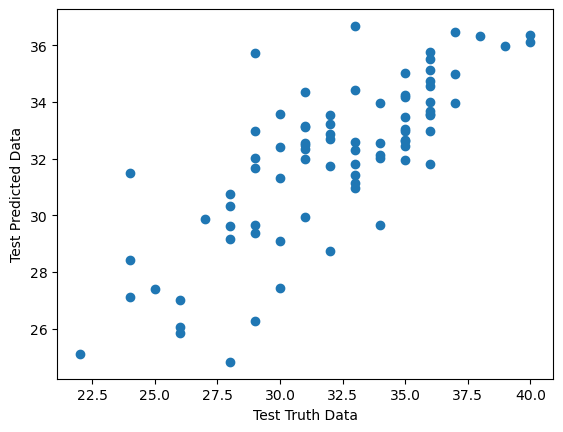

In [71]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [72]:
## residuals
residuals=y_test-reg_pred

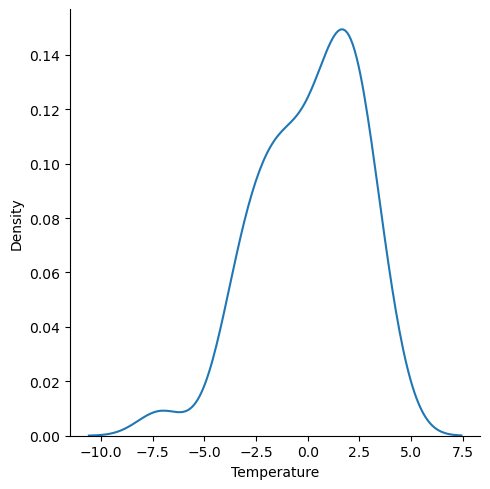

In [73]:
sns.displot(residuals,kind="kde")

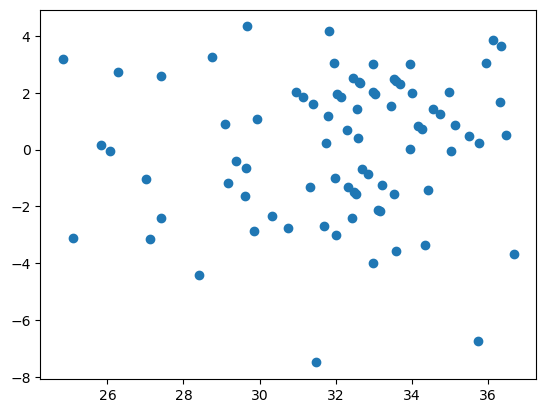

In [74]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

In [75]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

6.124774596218713
2.0616126398983243
2.4748281952933042


# R square and adjusted R square

In [76]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)


0.5949863318572136


In [77]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5371272364082442

# Ridge Regression

In [78]:
## Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()


In [79]:
ridge.fit(X_train,y_train)

Ridge()

In [80]:
ridge_pred = ridge.predict(X_test)

# Assumptions of Ridge Regresson

Text(0, 0.5, 'Test Predicted Data')

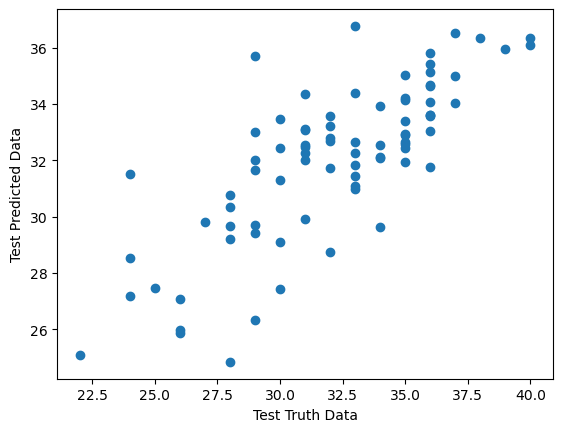

In [81]:

plt.scatter(y_test,ridge_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

In [82]:
## Residual
ridge_residuals = y_test-ridge_pred
ridge_residuals

164    1.870739
60     1.611998
61     2.437400
63     3.042947
69     2.046794
         ...   
171    0.331989
234   -6.704687
146    1.173161
210   -3.772551
105   -3.094730
Name: Temperature, Length: 81, dtype: float64

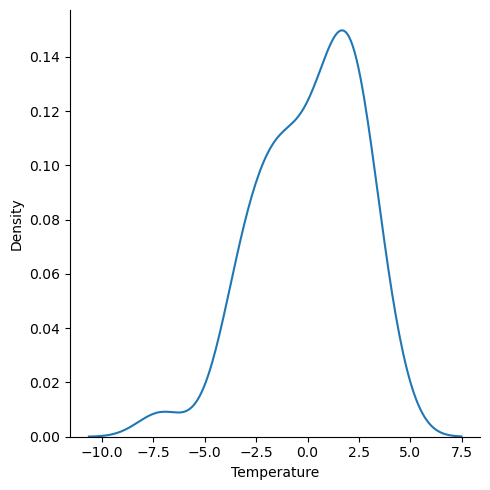

In [83]:
##Normal distribution expected
sns.displot(ridge_residuals,kind='kde')


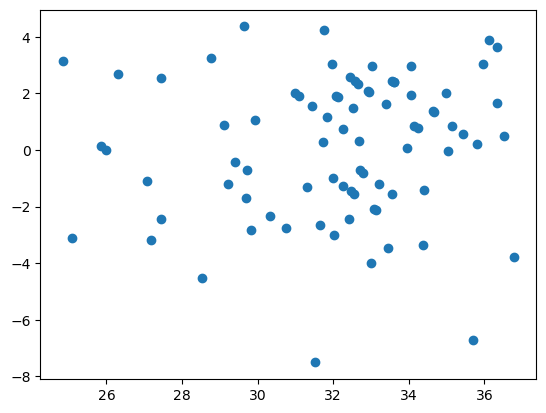

In [84]:
## Scatter plot with prediction and residual
## If it is Uniform distribution, model is good
plt.scatter(ridge_pred,ridge_residuals)

In [85]:
## Performance Matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

6.14447028271266
2.065566411464254
2.4788042041905327


In [86]:
#R2 score
from sklearn.metrics import r2_score
r_score_ridge=r2_score(y_test,ridge_pred)
print(r_score_ridge)


0.5936839129504952


In [87]:
## Adjusted R square
#display adjusted R-squared
1 - (1-r_score_ridge)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5356387576577087

# Lasso Regression

In [88]:
## Lasso
from sklearn.linear_model import Lasso
lasso=Lasso()


In [89]:
lasso.fit(X_train,y_train)


Lasso()

In [90]:
#Lasso Prediction 
lasso_pred = lasso.predict(X_test)


In [91]:

lasso_pred

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

# Assumptions of Lasso Regression

Text(0, 0.5, 'Test Predicted Data')

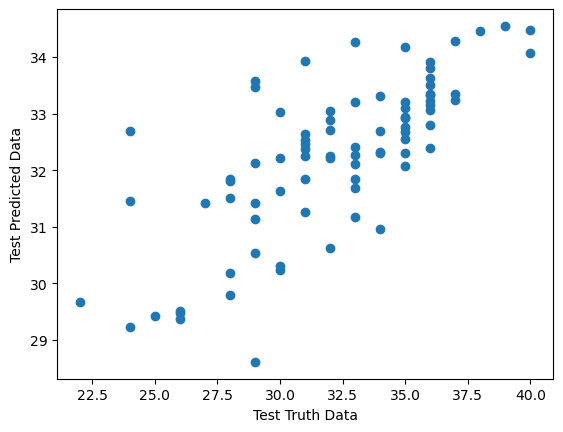

In [92]:
plt.scatter(y_test,lasso_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

In [93]:
## Residual
lasso_residuals = y_test-lasso_pred
lasso_residuals

164    1.702999
60     2.325597
61     2.933905
63     2.926530
69     2.075023
         ...   
171    0.583574
234   -4.568827
146    0.882714
210   -1.267362
105   -7.667085
Name: Temperature, Length: 81, dtype: float64

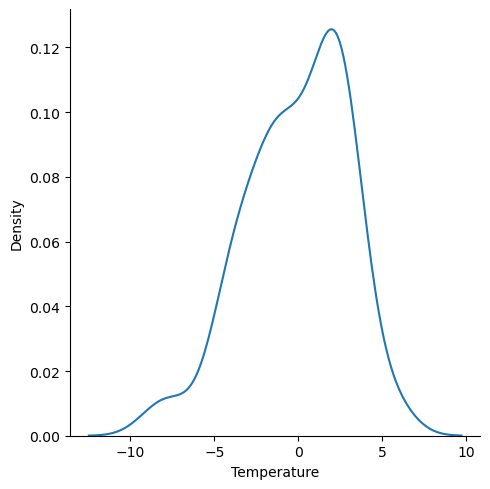

In [94]:
##Normal distribution expected
sns.displot(lasso_residuals,kind='kde')

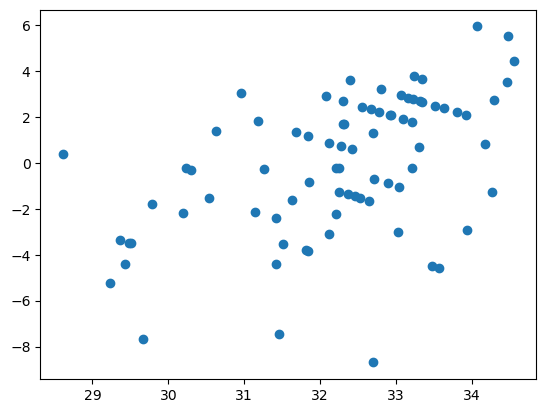

In [95]:
## Scatter plot with prediction and residual
## If it is Uniform distribution, model is good
plt.scatter(lasso_pred,lasso_residuals)

In [96]:
## Performance Matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))


9.10609532182792
2.4978660766652743
3.0176307464346794


In [97]:
#R2 score
from sklearn.metrics import r2_score
r_score_lasso=r2_score(y_test,lasso_pred)
print(r_score_lasso)

0.39784019626969913


In [98]:
## Adjusted R square
#display adjusted R-squared
1 - (1-r_score_lasso)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


0.31181736716537045

# Elastic Net Regression

In [99]:
## Elastic Net
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()

In [100]:
elasticnet.fit(X_train,y_train)


ElasticNet()

In [101]:
#ElasticNet Prediction 
elasticnet_pred = elasticnet.predict(X_test)

In [102]:
elasticnet_pred

array([31.96849993, 32.9285877 , 32.74102577, 31.7937955 , 32.89593392,
       33.91383589, 33.44859926, 32.6520612 , 31.94209007, 32.65225696,
       33.34481387, 29.89710641, 34.18210338, 30.67435755, 32.65945852,
       32.21099569, 32.80759978, 29.40256805, 35.08465192, 33.88501852,
       32.36233153, 33.33325695, 33.4722567 , 32.82841736, 35.1137581 ,
       30.03041688, 32.10493921, 32.59468206, 29.36555355, 32.0320653 ,
       29.14369383, 28.6128648 , 33.19892404, 32.32001666, 32.62204464,
       31.35558043, 30.04300005, 32.28018978, 29.1754207 , 33.94380787,
       32.7701881 , 33.51906949, 34.15655052, 31.54246557, 34.48897629,
       33.3548283 , 29.32252254, 33.91327691, 33.38225331, 30.34176683,
       31.40349589, 32.29644759, 34.62152368, 32.00926138, 31.34808463,
       30.93561323, 32.42956124, 34.79260841, 31.7028492 , 33.42969404,
       32.09351218, 32.39852866, 31.24718349, 28.8752595 , 31.93701242,
       34.83906503, 30.87191814, 31.05063201, 33.84559284, 32.89

# Assumptions of ElasticNet Regression

Text(0, 0.5, 'Test Predicted Data')

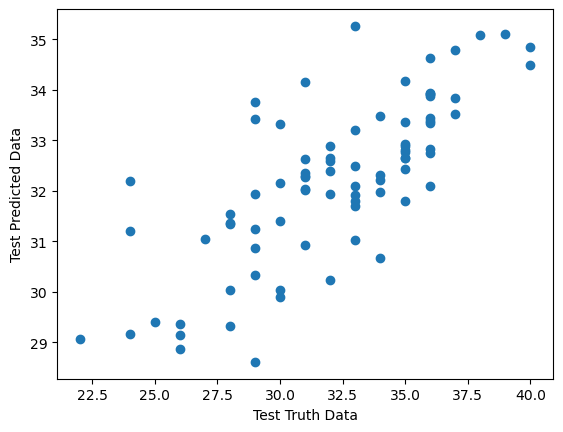

In [103]:
plt.scatter(y_test,elasticnet_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

In [104]:
## Residual
elasticnet_residuals = y_test-elasticnet_pred
elasticnet_residuals

164    2.031500
60     2.071412
61     3.258974
63     3.206205
69     2.104066
         ...   
171    0.508467
234   -4.754439
146    1.209016
210   -2.265393
105   -7.069698
Name: Temperature, Length: 81, dtype: float64

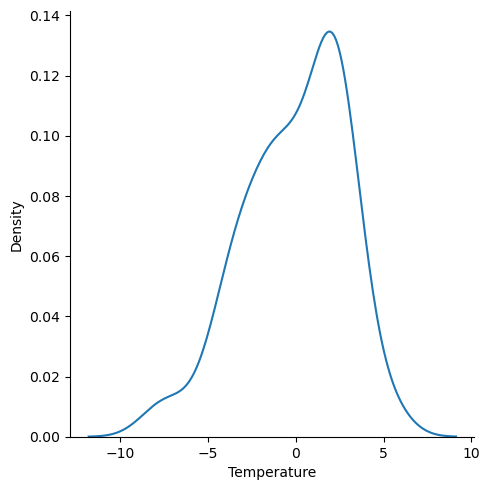

In [105]:
##Normal distribution expected
sns.displot(elasticnet_residuals,kind='kde')


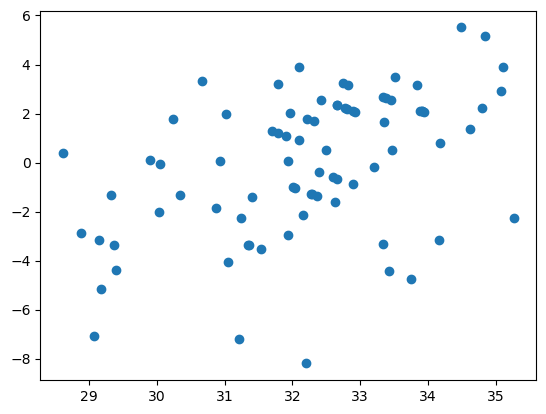

In [106]:
## Scatter plot with prediction and residual
## If it is Uniform distribution, model is good
plt.scatter(elasticnet_pred,elasticnet_residuals)


In [107]:
## Performance Matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elasticnet_pred))
print(mean_absolute_error(y_test,elasticnet_pred))
print(np.sqrt(mean_squared_error(y_test,elasticnet_pred)))

8.3291749910145
2.392517522029474
2.886031010057671


In [108]:
#R2 score
from sklearn.metrics import r2_score
r_score_elasticnet=r2_score(y_test,elasticnet_pred)
print(r_score_elasticnet)


0.4492156955789661


In [109]:
## Adjusted R square
#display adjusted R-squared
1 - (1-r_score_elasticnet)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3705322235188184